In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Morphomathematical operators

## Definitions

### Image
The image $X$ is defined as a the set of pixels, connect or not, equal to $1$ (or True), the backgound being set to $0$ (or False).

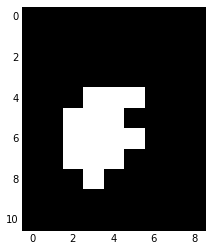

In [26]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

X = genfromtxt('../data/morpho_x.csv', delimiter=',',filling_values=0)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray);

### Structuring element

similarily one define a structuring element $B$ as a set of pixels (connected or not) having one origin $o$. Example of a 3x3 centered structuring element:

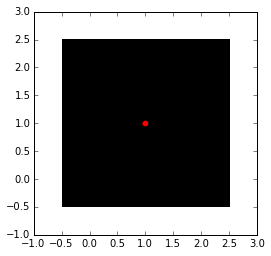

In [25]:
B = np.ones((3,3))
plt.imshow(B,interpolation='nearest',cmap=plt.cm.gray)
plt.plot(1,1,'or')
plt.gca().set_xlim(-1,3)
plt.gca().set_ylim(-1,3);

## Basic operations
### Image complement
Image complement consist in seting True pixels to false an False pixels to True, Image and background are switched.

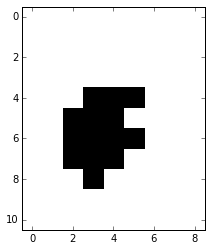

In [29]:
Xc = 1-X
plt.imshow(Xc,interpolation='nearest',cmap=plt.cm.gray);

### Symmetry

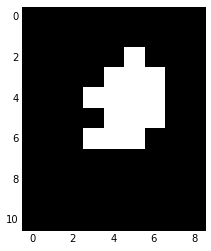

In [41]:
Xs = X[:,-1::-1][-1::-1,:]
plt.imshow(Xs,interpolation='nearest',cmap=plt.cm.gray);

### Translation
The $B_x$ structuring undergoes a 2D translation in the pixel $x = (3,5)$.

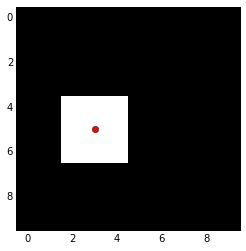

In [38]:
Bx = np.zeros((10,10))
x = (3,5)
Bx[x[1]-1:x[1]+2,x[0]-1:x[0]+2] = B
plt.plot(3,5,'or')
plt.imshow(Bx,interpolation='nearest',cmap=plt.cm.gray);

### Dilation
Dilation is defined such as:
$$X \oplus B = \{x : \hat B_x \cap X \ne \phi \}$$

### Erosion
Erosion is defined such as:
$$X \ominus B = \{x : B_x \subseteq X  \}$$

## Combined operations
### Opening
### Closing
### The Hit-or-Miss transform

## The gray level morphology
### Erosion
### Dilation

>see also:
* Morphological algorithms [MMIP](../00-Preface/06-References.ipynb#[MMIP]) p255-288